## FEATURE EXTRACTION FOR MUSIC SAMPLES


In [14]:
#After STFT we get Spectrograms,that are i/p to the neural networks.
import numpy as np
import librosa, librosa.display
import matplotlib.pyplot as plt


file = "Testaudios/Classical.wav"

# load audio file with Librosa
signal, sr = librosa.load(file, sr=22050)


Text(0.5, 1.0, 'Waveform')

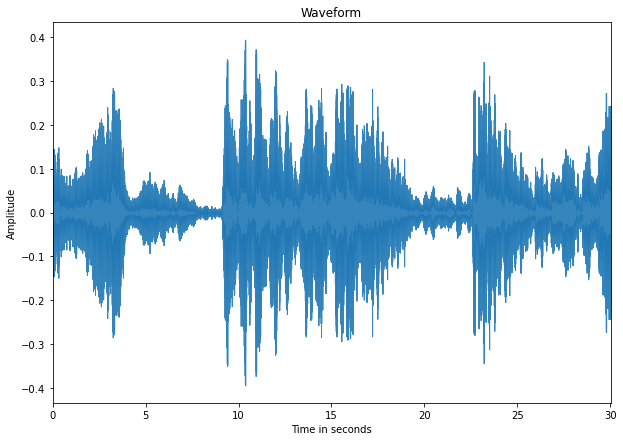

In [15]:
# WAVEFORM
# display waveform
plt.figure(figsize=(10,7))
librosa.display.waveplot(signal, sr, alpha=0.9)
plt.xlabel("Time in seconds")
plt.ylabel("Amplitude")
plt.title("Waveform")


Text(0.5, 1.0, 'Power spectrum')

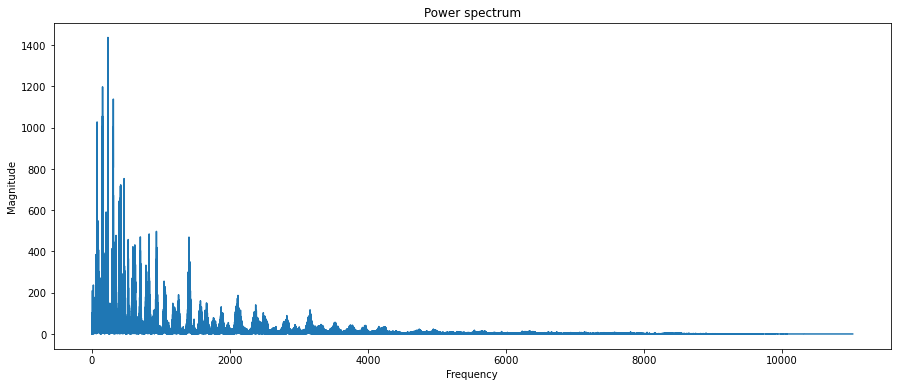

In [16]:
# perform Fourier transform ,getting power spectrum.
FFT = np.fft.fft(signal)

# calculate abs values on complex numbers to get magnitude
Spectrum = np.abs(FFT)

# create frequency variable
f = np.linspace(0, sr, len(Spectrum))

# take half of the spectrum and frequency
LeftSpectrum = Spectrum[:int(len(Spectrum)/2)]
#We only take ist half, o to nyquist frequency.The right and left part has same plot info.
#Full freq=22050,Half left=11025 which is x axis here.
LeftF = f[:int(len(Spectrum)/2)]

# plot spectrum
plt.figure(figsize=(15,6))
plt.plot(LeftF,LeftSpectrum)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power spectrum")
#Power spectra is a snapshot and energy is averaged over the full signal.



STFT hop length duration is: 0.023219954648526078s
STFT window duration is: 0.09287981859410431s


Text(0.5, 1.0, 'Spectrogram')

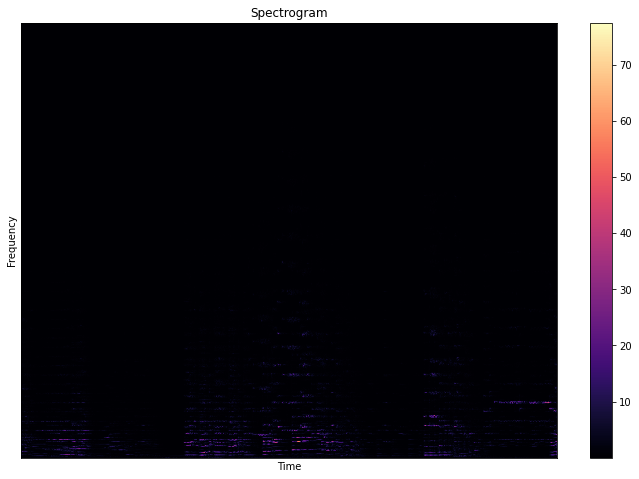

In [17]:
# STFT -> spectrogram which is fxn of both freq and time
HOPLENGTH = 512 # samples or intervals moved towards right while calculating STFT.
n_fft = 2048 # window in num. of samples

# calculate duration hop length and window in seconds
hop_length_duration = float(HOPLENGTH)/sr
n_fft_duration = float(n_fft)/sr

print("STFT hop length duration is: {}s".format(hop_length_duration))
print("STFT window duration is: {}s".format(n_fft_duration))

# perform stft
STFT = librosa.stft(signal, n_fft=n_fft, hop_length=HOPLENGTH)

# calculate abs values on complex numbers to get magnitude
Spectrogram = np.abs(STFT)

# display spectrogram
plt.figure(figsize=(12,8))
librosa.display.specshow(Spectrogram, sr=sr, hop_length=HOPLENGTH)
#Specshow is like a heat map.Amplitude is expressed by color versus frequency and time.
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.title("Spectrogram")


In [18]:
#this spectrogram is linear and most of energy is in lower amplitude,frequencies contribute very less.
#So we move to logarithmic spectrogram to have a nicer plot fitting to human perception.

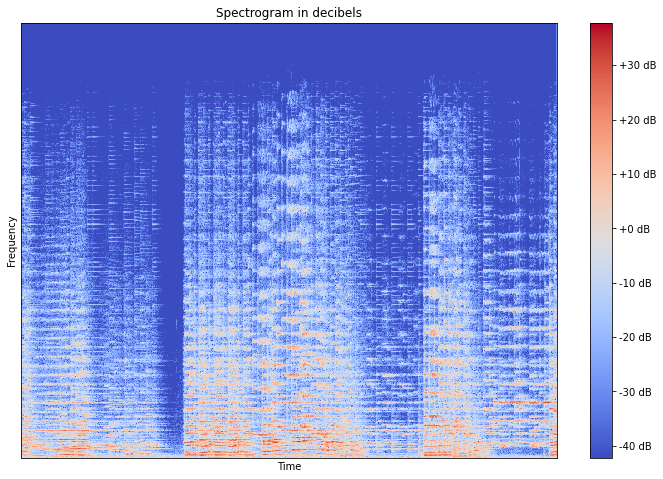

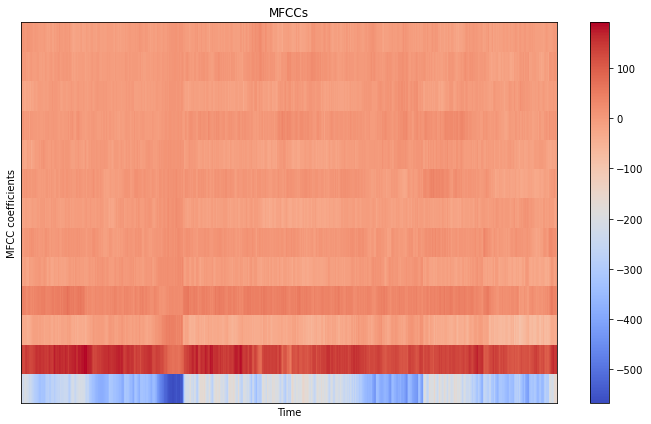

In [19]:
# By log converting amplitude to Decibels
LogSpectrogram = librosa.amplitude_to_db(Spectrogram)

plt.figure(figsize=(12,8))
librosa.display.specshow(LogSpectrogram, sr=sr, hop_length=HOPLENGTH)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram in decibels")


# extract 13 MFCCs
MFCCs = librosa.feature.mfcc(signal, sr, n_fft=n_fft, hop_length=HOPLENGTH, n_mfcc=13)

# display MFCCs
plt.figure(figsize=(12,7))
librosa.display.specshow(MFCCs, sr=sr, hop_length=HOPLENGTH)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.title("MFCCs")

# show plots
plt.show()


In [20]:
#Most of enery concentrated at lower frequencies.Decibel scale gives the energy of signal over logarithmic scale.
#MFCCS are the coefficients whih evolve or change with time.These are 13 usually for music purposes.